# Looking at the dimuon spectrum over a wide energy range

<h3>Learning goals</h3>
<ul>
    <li>Relativistic kinematics.
    <li>Mesons.
</ul>

<b>Background</b>

To determine the mass ($m$) of a particle you need to know the 4-momenta of the particles ($\mathbf{P}$) that are detected after the collision: the energy ($E$), the momentum in the x direction ($p_x$), the momentum in the y direction ($p_y$), the momentum in the z direction ($p_z$).

$$\mathbf{P} = (E,p_x,p_y,p_z)$$


\begin{equation*} m = \sqrt{E^2-(p_x^2+p_y^2 + p_z^2)} \end{equation*}

Some particles are very unstable and decay (turn into) to two or more other particles. In fact, they can decay so quickly, that they never interact with your detector! Yikes!

However, we can reconstruct the parent particle (sometimes referred to as <b>the initial state particle</b>) and its 4-momentum by adding the 4-momenta of the child particles (sometimes referred to as <b>the decay products</b>). 

$$\mathbf{P_{\rm parent}} = \mathbf{P_{\rm child 0}} + \mathbf{P_{\rm child 1}} + \mathbf{P_{\rm child 2}} + ...$$



which breaks down into...

$$E_{\rm parent} = E_{\rm child 0} + E_{\rm child 1} + E_{\rm child 2} + ...$$

$$p_{\rm x parent} = p_{\rm x child 0} + p_{\rm x child 1} + p_{\rm x child 2} + ...$$

$$p_{\rm y parent} = p_{\rm y child 0} + p_{\rm y child 1} + p_{\rm y child 2} + ...$$

$$p_{\rm z parent} = p_{\rm z child 0} + p_{\rm y child 1} + p_{\rm z child 2} + ...$$


<b>Let's code!</b>

Here is some very, very basic starter code. It reads in data from the CMS experiment. 

If you haven't already, you will want to go through the <a href="https://github.com/particle-physics-playground/playground/blob/master/activities/data_model.ipynb">CMS data model</a> (also included when you cloned this directory) exercise so you know how to pull out the relevant information. 

The following example runs with 1000 events that are included with this repository. To better see the full physics, you can download a bigger file, <code>dimuons_100k.dat</code>. To download this file, see the <a href="https://github.com/particle-physics-playground/playground/blob/master/activities/download_more_data.ipynb">download_more_data</a> exercise, also included in this repository.

In [1]:
#inFile = open("../data/dimuons_1000_collisions.txt", "r")

# Only uncomment this, if you have downloaded the data file. 
inFile = open("../data/dimuons_100k.dat", "r")

import sys
sys.path.append("../tools/")
import cms_tools
import matplotlib.pyplot as plt
%matplotlib inline

print "Reading in the data...."
collisions = cms_tools.get_collisions(inFile)
    
print len(collisions)


Reading in the data....
100000


<h2><font color="red">Challenge!</font></h2>

Use the sample code to find the mass of the particle that the two muons came from (parent particle). 

To do this, you will need to loop over all pairs of muons for each collision, sum their 4-momenta (energy, px, py, and pz) and then use that to calculate the invariant mass. 

Do this for all possible pairs and in addition, break it down so that you calculate the invariant mass for the cases where:
* Both muons are positively charged.
* Both muons are negatively charged.
* The muons have opposite charges.

Be careful. Some collisions may have more than 2 muons, so write your code such that it calculates all possible pairs of muons in a given collisions. For example, if there are 3 muons in a collision, there are 3 possible pairs that you can make. 

<i>Hint!</i>

It is very likely that a particle exists where there is a peak in the data. However, this is not always true. 
A peak in the data is most likely the mass of a particle. You can look at the approximate mass to figure out which particle 
is found in the data.

Your histogram should look something like the following sketch. The value of the peaks should be the mass of a particle. You should be able to find two particles in their ground state. <a href="http://en.wikipedia.org/wiki/J/psi_meson">Check your answer for the first particle!</a> <a href="http://en.wikipedia.org/wiki/Upsilon_meson">Check your answer for the second particle!</a> 

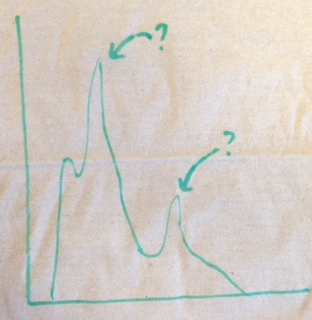

In [2]:
from IPython.display import Image
Image(filename='images/dimuons_sketch.jpeg')

In [3]:
# Take sum of energies and momentums from for loops and add them into function

In [4]:
from math import sqrt
def mass(E,px,py,pz):
    m1 = (E**2-(px**2+py**2+pz**2))
    if m1>=0:
        return sqrt(m1)
    else:
        return sqrt(-m1)

In [5]:
import sys
sys.path.append("../tools/")
import cms_tools

infile = open("../data/dimuons_100k.dat", "r")
print "Reading in the data...."
collisions = cms_tools.get_collisions(infile)


Reading in the data....


100000


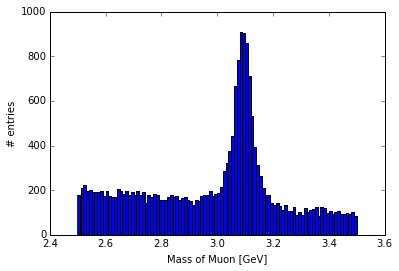

In [24]:
print len(collisions)

masses = []
nmuons = []

dimuons = [] # masses of pairs of muons

for collision in collisions:
    
    jets,muons,electrons,photons,met = collision
    
    nmuon=len(muons)
    
    nmuons.append(nmuon)

    if nmuon == 2:
        E0,px0,py0,pz0,q0=muons[0]
        E1,px1,py1,pz1,q1=muons[1]
        E = E0+E1
        px = px0 + px1
        py = py0 + py1
        pz = pz0 + pz1
        q = q0 + q1
        m = mass(E,px,py,pz)
        dimuons.append(m)
        
        
plt.hist(dimuons,bins=100,range=(2.5,3.5))
plt.xlabel('Mass of Muon [GeV]')
plt.ylabel('# entries')


In [56]:
# HINTS
# Figure out what the parent particle is
# They are both mesons (one is close to 3Gev and 9.5Gev)
# Should come up with a charming and beautiful answer

## Particles

First particle is a j/psi meson, which is approximately 3.096 GeV

What quarks are inside the j/psi meson?
* Charm and anti-charm

Second particle is upsilon meson, which is approximately 9.5 GeV

#### Comments

Depending on which file you ran over, you may see hints of particles below 20 GeV/c$^2$. It is possible you see signs of other particles at even higher energies. Plot your masses over a wide range of values, but then zoom in (change the plotting range) on different mass ranges to see if you can identify these particles.  